In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
plt.style.use('fivethirtyeight')

In [2]:
train=  pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df=train.copy()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling Missing Value

<AxesSubplot:>

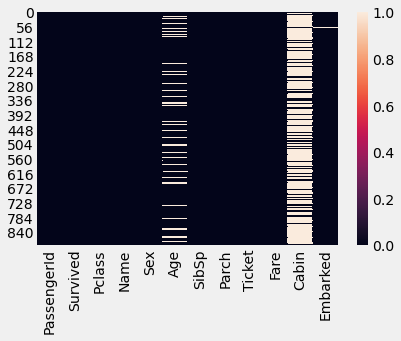

In [4]:
sns.heatmap(df.isnull())

In [5]:
print(df['Age'].median())
df['Age'].fillna(df['Age'].median(),inplace=True)

28.0


In [6]:
df.drop('Cabin',axis=1,inplace=True)

In [7]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

# Encoding

In [8]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [9]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df2= df.copy()

In [12]:
df2 =pd.get_dummies(data=df2,columns=['Sex','Embarked'],drop_first=True)

In [13]:
df2

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


# Feature Scaling

In [14]:
df3=df2.copy()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

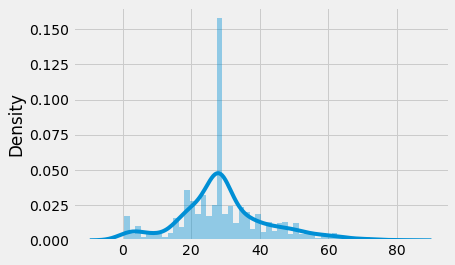

In [15]:
sns.distplot(df3[['Age']],bins=50)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

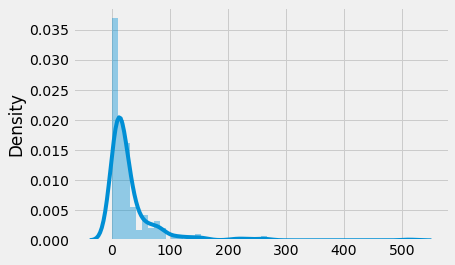

In [16]:
sns.distplot(df3[['Fare']],bins=50)

In [17]:
df3[df3['Fare']>300]['Fare'].value_counts()

512.3292    3
Name: Fare, dtype: int64

In [22]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
minmax_scaler= StandardScaler()
scaled_data= minmax_scaler.fit_transform(df3)

In [23]:
scaled_df=pd.DataFrame(scaled_data,columns=df3.columns)
scaled_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,-0.789272,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.615838
1,1.266990,-1.566107,0.663861,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.623803
2,1.266990,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.615838
3,1.266990,-1.566107,0.433312,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.615838
4,-0.789272,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0.737695,-0.307562,0.615838
887,1.266990,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,-1.355574,-0.307562,0.615838
888,-0.789272,0.827377,-0.104637,0.432793,2.008933,-0.176263,-1.355574,-0.307562,0.615838
889,1.266990,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.737695,-0.307562,-1.623803


In [24]:
scaled_df.to_csv("train_cleaned.csv")